# Redes Neuronales Artificiales con Validación Cruzada

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
data = pd.read_csv('../Datasets/bank_deposit.csv')
data.head(8)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1
5,6,172,0,1,1,1,0,0,1
6,7,583,0,1,1,0,0,0,1
7,8,426,0,1,1,1,0,0,1


In [3]:
data.dtypes

idcliente    int64
duration     int64
previous     int64
housing      int64
campaign     int64
loan         int64
default      int64
target       int64
muestra      int64
dtype: object

In [4]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [5]:
data.dtypes

idcliente     int64
duration      int64
previous      int64
housing      object
campaign      int64
loan         object
default      object
target        int64
muestra       int64
dtype: object

In [6]:
data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [7]:
data['housing'].value_counts()

housing
0    5530
1    5048
Name: count, dtype: int64

In [8]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0


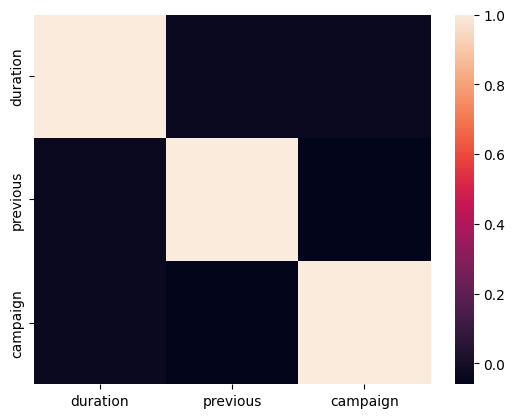

In [9]:
sns.heatmap(data.loc[:,['duration','previous','campaign']].corr())
plt.show()

Prueba de normalidad
* Ho: la variable se aproxima a una distribución normal
* Ha: la variable no se aproxima a una distribución normal

In [10]:
variables = ['duration', 'previous', 'campaign']
alpha = 0.05
for var in variables:
    stat, p_value = ss.shapiro(data[var])
    
    print(f'Prueba de normalidad para la variable {var}:')
    print(f'Estadístico de prueba: {stat:.2f}')
    print(f'P-valor: {p_value:.2f}')
    
    if p_value < alpha:
        print('La hipótesis nula (Ho) se rechaza.')
        print('La variable no se aproxima a una distribución normal.')
    else:
        print('La hipótesis nula (Ho) no se rechaza.')
        print('La variable se aproxima a una distribución normal.')
    print()

Prueba de normalidad para la variable duration:
Estadístico de prueba: 0.81
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable previous:
Estadístico de prueba: 0.41
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable campaign:
Estadístico de prueba: 0.56
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Prueba de Correlación
* Ho: no existe correlación entre las variables
* Ha: existe correlación entre las variables

In [13]:
variables = ['duration', 'previous', 'campaign']
alpha = 0.05
method = "spearmanr"
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        # para data no distribuida normalmente
        if method == "spearmanr": 
            correlation, p_value = ss.spearmanr(data[var1], data[var2])
            
        # para data no distribuida normalmente - preferido sobre spearman
        elif method == "kendall":
            correlation, p_value = ss.kendalltau(data[var1], data[var2])
            
        # para data distribuida normalmente
        elif method == "pearsonr":
            correlation, p_value = ss.pearsonr(data[var1], data[var2])

        
        print(f'Correlación entre {var1} y {var2}:')
        print(f'Coeficiente de correlación de {method}: {correlation:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe correlación entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe correlación entre las variables.')
        print()

Correlación entre duration y previous:
Coeficiente de correlación de spearmanr: 0.01
P-valor: 0.45
La hipótesis nula (Ho) no se rechaza.
No existe correlación entre las variables.

Correlación entre duration y campaign:
Coeficiente de correlación de spearmanr: -0.05
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre previous y campaign:
Coeficiente de correlación de spearmanr: -0.13
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.



In [14]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [17]:
data.target.value_counts()

target
0    5289
1    5289
Name: count, dtype: int64

In [18]:
100*data['target'].value_counts(normalize=True)

target
0    50.0
1    50.0
Name: proportion, dtype: float64

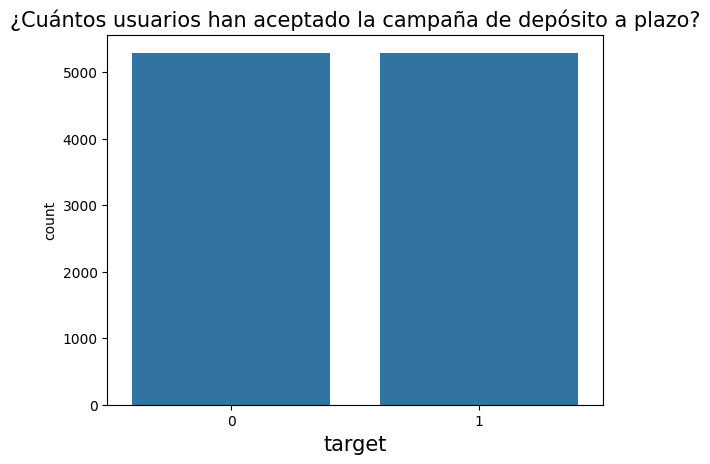

In [19]:
sns.countplot(data = data, x = 'target')
plt.xlabel('target', fontsize = 15)
plt.title('¿Cuántos usuarios han aceptado la campaña de depósito a plazo?', fontsize = 15)
plt.show()

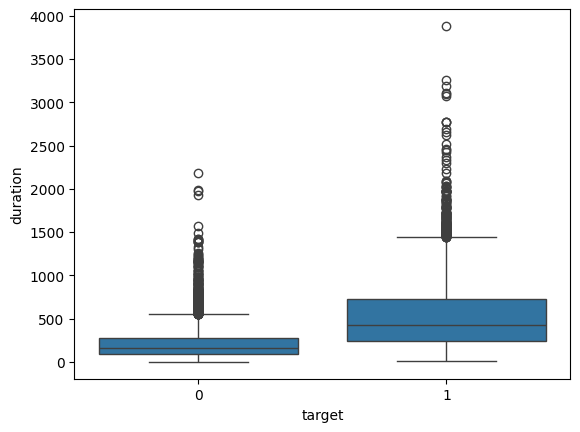

In [20]:
sns.boxplot(x='target',y='duration',data=data)
plt.show()

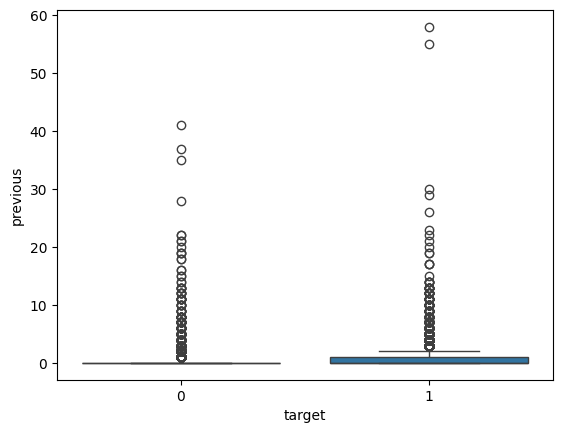

In [21]:
sns.boxplot(x='target',y='previous',data=data)
plt.show()

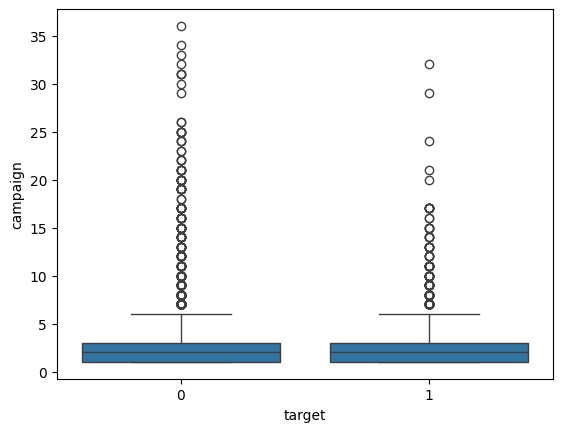

In [22]:
sns.boxplot(x='target',y='campaign',data=data)
plt.show()

housing     0     1
target             
0        2176  3113
1        3354  1935


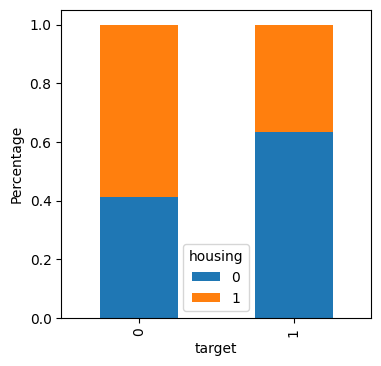

In [23]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


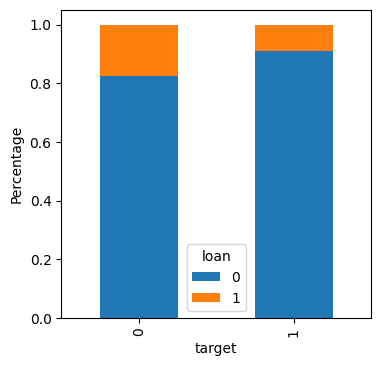

In [24]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

default     0   1
target           
0        5202  87
1        5237  52


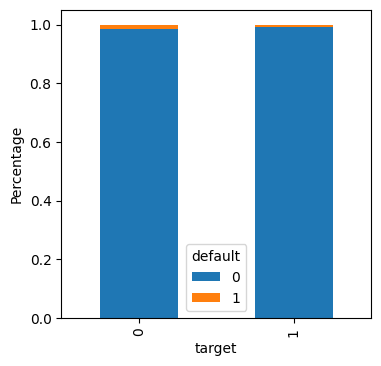

In [25]:
print(pd.crosstab(data["target"],data["default"]))
t = pd.crosstab(data["target"],data["default"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

Prueba Chi-Cuadrado
* Ho: no existe dependencia entre las variables
* Ha: existe dependencia entre las variables

In [15]:
variables = ['target', 'housing', 'loan', 'default']
alpha = 0.05
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        
        contingency_table = pd.crosstab(data[var1], data[var2])
        chi2, p_value, dof, expected = ss.chi2_contingency(contingency_table)
        
        print(f'Prueba Chi-Cuadrado entre {var1} y {var2}:')
        print(f'Estadístico Chi-Cuadrado: {chi2:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe dependencia entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe dependencia entre las variables.')
        print()

Prueba Chi-Cuadrado entre target y housing:
Estadístico Chi-Cuadrado: 524.94
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe dependencia entre las variables.

Prueba Chi-Cuadrado entre target y loan:
Estadístico Chi-Cuadrado: 161.65
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe dependencia entre las variables.

Prueba Chi-Cuadrado entre target y default:
Estadístico Chi-Cuadrado: 8.43
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe dependencia entre las variables.

Prueba Chi-Cuadrado entre housing y loan:
Estadístico Chi-Cuadrado: 98.74
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe dependencia entre las variables.

Prueba Chi-Cuadrado entre housing y default:
Estadístico Chi-Cuadrado: 1.95
P-valor: 0.16
La hipótesis nula (Ho) no se rechaza.
No existe dependencia entre las variables.

Prueba Chi-Cuadrado entre loan y default:
Estadístico Chi-Cuadrado: 39.09
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe dependencia entre las variables.



In [29]:
X = data[['c_housing','c_loan','c_default','duration','previous','campaign']]
y = data['target']

In [31]:
X = X.to_numpy()
X[0:5]

array([[   1,    0,    0,  261,    0,    1],
       [   1,    0,    0,   50,    0,    1],
       [   1,    0,    0, 1492,    0,    1],
       [   1,    0,    0,  104,    0,    1],
       [   1,    0,    0,   13,    0,    1]], dtype=int64)

In [33]:
y = y.to_numpy()
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

Redes Neuronales Artificiales

- hidden_layer_sizes : Establece el número de capas y el número de nodos. Cada elemento de la tupla representa el número de nodos en la i-ésima posición donde i es el índice de la tupla, por lo tanto, la longitud de la tupla denota el número total de capas ocultas en la red.

- activation: Fución de activiación para las capas ocultas.
- solver: Algoritmo para la optimización del peso en los nodos.
- alpha: Parámetro de penalización.
- learning_rate: se usa para la actualización de pesos.
- max_iter: Denota el número de épocas.
- random_state: Establece una semilla para reproducir los mismos resultados.

In [45]:
cv_scores = cross_val_score(MLPClassifier(), X_train, y_train, cv=5)
cv_scores

array([0.79208506, 0.81453042, 0.79314421, 0.81382979, 0.78309693])

In [46]:
print("cv_scores mean: {}".format(np.mean(cv_scores)))
print("cv_scores std: {}".format(np.std(cv_scores)))

cv_scores mean: 0.7993372794946232
cv_scores std: 0.012613978091379461


In [38]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [39]:
grid.best_params_

MLPClassifier(alpha=0.05, hidden_layer_sizes=(20,), learning_rate='adaptive',
              max_iter=500)


In [40]:
classifier = MLPClassifier(hidden_layer_sizes=(10,30,10),max_iter=500,alpha=0.05, learning_rate="adaptive").fit(X_train, y_train)
y_pred = classifier.predict(X_test)

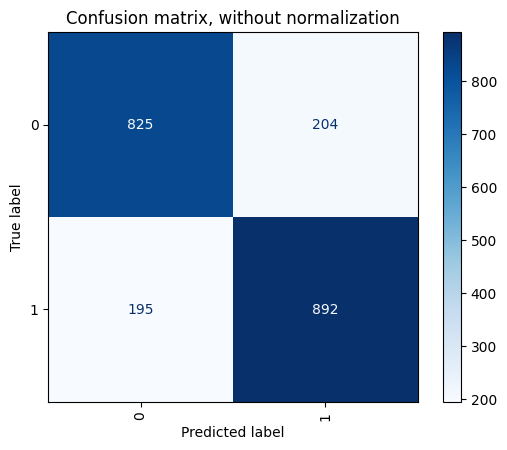

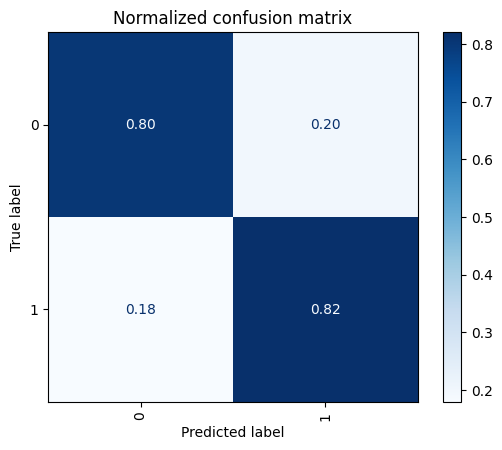

In [41]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

plt.show()

In [42]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.11289243, 0.88710757],
       [0.12838899, 0.87161101],
       [0.66222301, 0.33777699],
       [0.08747889, 0.91252111],
       [0.18826536, 0.81173464]])

In [43]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8765961897967229

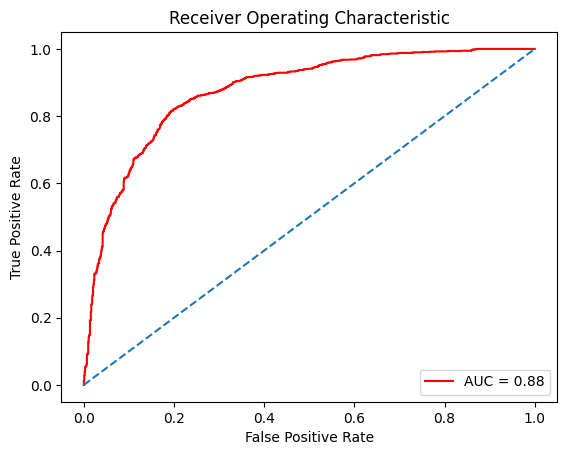

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1029
           1       0.81      0.82      0.82      1087

    accuracy                           0.81      2116
   macro avg       0.81      0.81      0.81      2116
weighted avg       0.81      0.81      0.81      2116



In [49]:
dataf_combined = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf_combined.columns = ['housing', 'loan', 'default', 'duration', 'previous', 'campaign','Deposit', 'Deposit_Pred', 'Deposit_Pred_Prob_0', 'Deposit_Pred_Prob_1']
dataf_combined.head(10)

,housing,loan,default,duration,previous,campaign,Deposit,Deposit_Pred,Deposit_Pred_Prob_0,Deposit_Pred_Prob_1
0,-0.949512,-0.393381,-0.117893,-0.332574,0.062612,-0.564943,1,1,0.112892,0.887108
1,-0.949512,-0.393381,-0.117893,0.624597,-0.365356,-0.564943,1,1,0.128389,0.871611
2,-0.949512,-0.393381,-0.117893,-0.656407,-0.365356,-0.191987,0,0,0.662223,0.337777
3,-0.949512,-0.393381,-0.117893,1.541647,-0.365356,-0.564943,1,1,0.087479,0.912521
4,1.053173,-0.393381,-0.117893,0.071501,0.918548,-0.564943,1,1,0.188265,0.811735
5,1.053173,-0.393381,-0.117893,-1.014630,-0.365356,-0.564943,0,0,0.965578,0.034422
6,1.053173,-0.393381,-0.117893,1.607560,0.918548,-0.564943,1,1,0.094005,0.905995
7,-0.949512,-0.393381,-0.117893,-0.905730,-0.365356,-0.191987,0,0,0.936695,0.063305
8,-0.949512,-0.393381,-0.117893,0.590208,-0.365356,-0.191987,0,1,0.186749,0.813251
9,-0.949512,-0.393381,-0.117893,-0.478729,-0.365356,-0.564943,1,1,0.366264,0.633736


In [50]:
df_original_features = pd.DataFrame(X_test, columns=['housing', 'loan', 'default', 'duration', 'previous', 'campaign'])
df_original = pd.DataFrame(transformer.inverse_transform(df_original_features), columns=['housing', 'loan', 'default', 'duration', 'previous', 'campaign'])

df_original[['Deposit', 'Deposit_Pred', 'Deposit_Pred_Prob_0', 'Deposit_Pred_Prob_1']] = dataf_combined[['Deposit', 'Deposit_Pred', 'Deposit_Pred_Prob_0', 'Deposit_Pred_Prob_1']]
df_original.head(10)

,housing,loan,default,duration,previous,campaign,Deposit,Deposit_Pred,Deposit_Pred_Prob_0,Deposit_Pred_Prob_1
0,0.0,0.0,0.0,263.0,1.0,1.0,1,1,0.112892,0.887108
1,0.0,0.0,0.0,597.0,0.0,1.0,1,1,0.128389,0.871611
2,0.0,0.0,0.0,150.0,0.0,2.0,0,0,0.662223,0.337777
3,0.0,0.0,0.0,917.0,0.0,1.0,1,1,0.087479,0.912521
4,1.0,0.0,0.0,404.0,3.0,1.0,1,1,0.188265,0.811735
5,1.0,0.0,0.0,25.0,0.0,1.0,0,0,0.965578,0.034422
6,1.0,0.0,0.0,940.0,3.0,1.0,1,1,0.094005,0.905995
7,0.0,0.0,0.0,63.0,0.0,2.0,0,0,0.936695,0.063305
8,0.0,0.0,0.0,585.0,0.0,2.0,0,1,0.186749,0.813251
9,0.0,0.0,0.0,212.0,0.0,1.0,1,1,0.366264,0.633736


In [51]:
quantiles = df_original['Deposit_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.099775
0.4    0.347216
0.6    0.665919
0.8    0.871366
Name: Deposit_Pred_Prob_1, dtype: float64

In [52]:
def asignar_categoria(valor):
    if valor <= quantiles.iloc[0]:
        return 'Muy bajo'
    elif valor <= quantiles.iloc[1]:
        return 'Bajo'
    elif valor <= quantiles.iloc[2]:
        return 'Medio'
    elif valor <= quantiles.iloc[3]:
        return 'Alto'
    else:
        return 'Muy alto'

df_original['Score'] = df_original['Deposit_Pred_Prob_1'].apply(asignar_categoria)
df_original

,housing,loan,default,duration,previous,campaign,Deposit,Deposit_Pred,Deposit_Pred_Prob_0,Deposit_Pred_Prob_1,Score
0,0.0,0.0,0.0,263.0,1.0,1.0,1,1,0.112892,0.887108,Muy alto
1,0.0,0.0,0.0,597.0,0.0,1.0,1,1,0.128389,0.871611,Muy alto
2,0.0,0.0,0.0,150.0,0.0,2.0,0,0,0.662223,0.337777,Bajo
3,0.0,0.0,0.0,917.0,0.0,1.0,1,1,0.087479,0.912521,Muy alto
4,1.0,0.0,0.0,404.0,3.0,1.0,1,1,0.188265,0.811735,Alto
...,...,...,...,...,...,...,...,...,...,...,...
2111,1.0,0.0,0.0,144.0,0.0,5.0,0,0,0.980349,0.019651,Muy bajo
2112,1.0,0.0,0.0,56.0,0.0,3.0,0,0,0.983564,0.016436,Muy bajo
2113,0.0,0.0,0.0,327.0,0.0,1.0,1,1,0.279871,0.720129,Alto
2114,1.0,0.0,0.0,821.0,0.0,2.0,1,1,0.158489,0.841511,Alto
